# Importing Dependences and Data

In [218]:
import numpy
import pandas as pd
import os
import sys
sys.path.append(os.path.abspath("../data"))
sys.path.append(os.path.abspath("../src"))

In [219]:
df = pd.read_csv("../data/processed/processed_resume.csv")

In [220]:
df.head()

,Unnamed: 0,Category,Resume,num_unique_words,avg_word_length,num_tech_keywords,has_management_terms,has_degree,num_certs,num_langs,word_count,vocab_density
0,0,data science,programming language python panda numpy scipy ...,5.720312,6.925000,3.526361,0,0,0,6,6.175867,0.633333
1,1,data science,education detail uitrgpv data scientist data s...,4.356709,7.366071,1.945910,0,0,0,2,4.727388,0.687500
2,2,data science,area interest deep learning control system des...,4.820282,7.104651,2.890372,0,1,0,6,5.153292,0.715116
3,3,data science,r python sap hana tableau sap hana sql sap han...,5.758902,6.731387,4.094345,1,1,0,4,6.530878,0.461314
4,4,data science,education detail mca ymcaust faridabad haryana...,3.258097,6.125000,1.609438,0,0,0,3,3.891820,0.520833


# Model Selection

1. RidgeLogistic Regression
2. RandomForestClassifier
3. XGBoostClassifier

In [221]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, FunctionTransformer
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import classification_report, f1_score
from sklearn import set_config
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import joblib

In [222]:

df.head()

,Unnamed: 0,Category,Resume,num_unique_words,avg_word_length,num_tech_keywords,has_management_terms,has_degree,num_certs,num_langs,word_count,vocab_density
0,0,data science,programming language python panda numpy scipy ...,5.720312,6.925000,3.526361,0,0,0,6,6.175867,0.633333
1,1,data science,education detail uitrgpv data scientist data s...,4.356709,7.366071,1.945910,0,0,0,2,4.727388,0.687500
2,2,data science,area interest deep learning control system des...,4.820282,7.104651,2.890372,0,1,0,6,5.153292,0.715116
3,3,data science,r python sap hana tableau sap hana sql sap han...,5.758902,6.731387,4.094345,1,1,0,4,6.530878,0.461314
4,4,data science,education detail mca ymcaust faridabad haryana...,3.258097,6.125000,1.609438,0,0,0,3,3.891820,0.520833


In [223]:
df.drop(["Unnamed: 0"], axis = 1, inplace= True)
df.head(1)


,Category,Resume,num_unique_words,avg_word_length,num_tech_keywords,has_management_terms,has_degree,num_certs,num_langs,word_count,vocab_density
0,data science,programming language python panda numpy scipy ...,5.720312,6.925,3.526361,0,0,0,6,6.175867,0.633333


In [224]:
y = df["Category"]
y.head()

0    data science
1    data science
2    data science
3    data science
4    data science
Name: Category, dtype: object

In [225]:
df

,Category,Resume,num_unique_words,avg_word_length,num_tech_keywords,has_management_terms,has_degree,num_certs,num_langs,word_count,vocab_density
0,data science,programming language python panda numpy scipy ...,5.720312,6.925000,3.526361,0,0,0,6,6.175867,0.633333
1,data science,education detail uitrgpv data scientist data s...,4.356709,7.366071,1.945910,0,0,0,2,4.727388,0.687500
2,data science,area interest deep learning control system des...,4.820282,7.104651,2.890372,0,1,0,6,5.153292,0.715116
3,data science,r python sap hana tableau sap hana sql sap han...,5.758902,6.731387,4.094345,1,1,0,4,6.530878,0.461314
4,data science,education detail mca ymcaust faridabad haryana...,3.258097,6.125000,1.609438,0,0,0,3,3.891820,0.520833
...,...,...,...,...,...,...,...,...,...,...,...
957,testing,computer proficient m office word basic excel ...,4.762174,6.504717,2.079442,1,1,0,2,5.361292,0.547170
958,testing,willingness accept challenge positive thinking...,4.969813,7.532663,1.386294,1,0,0,1,5.298317,0.718593
959,testing,personal quick learner eagerness learn new thi...,5.147494,6.779605,0.000000,1,1,3,1,5.720312,0.562500
960,testing,computer software knowledge mspower point m of...,4.077537,6.435897,1.386294,1,0,0,2,4.369448,0.743590


In [226]:
X = df.drop(["Category"], axis = 1)
X

,Resume,num_unique_words,avg_word_length,num_tech_keywords,has_management_terms,has_degree,num_certs,num_langs,word_count,vocab_density
0,programming language python panda numpy scipy ...,5.720312,6.925000,3.526361,0,0,0,6,6.175867,0.633333
1,education detail uitrgpv data scientist data s...,4.356709,7.366071,1.945910,0,0,0,2,4.727388,0.687500
2,area interest deep learning control system des...,4.820282,7.104651,2.890372,0,1,0,6,5.153292,0.715116
3,r python sap hana tableau sap hana sql sap han...,5.758902,6.731387,4.094345,1,1,0,4,6.530878,0.461314
4,education detail mca ymcaust faridabad haryana...,3.258097,6.125000,1.609438,0,0,0,3,3.891820,0.520833
...,...,...,...,...,...,...,...,...,...,...
957,computer proficient m office word basic excel ...,4.762174,6.504717,2.079442,1,1,0,2,5.361292,0.547170
958,willingness accept challenge positive thinking...,4.969813,7.532663,1.386294,1,0,0,1,5.298317,0.718593
959,personal quick learner eagerness learn new thi...,5.147494,6.779605,0.000000,1,1,3,1,5.720312,0.562500
960,computer software knowledge mspower point m of...,4.077537,6.435897,1.386294,1,0,0,2,4.369448,0.743590


# Encode Label 

In [227]:
lab_enc = LabelEncoder()
y_encoded = lab_enc.fit_transform(y)  


In [270]:
joblib.dump(lab_enc, "../models/label_encoder.pkl")

['../models/label_encoder.pkl']

In [228]:
y_df = pd.DataFrame(y_encoded, columns=["Category"], index= None)

# Stratified splits of X and y, to get training, validation and test sets 

In [229]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y_df,test_size=0.3, stratify= y_df, random_state=42)

In [230]:
X_test, X_valid, y_test, y_valid = train_test_split(X_temp,y_temp, test_size= 0.5, stratify= y_temp, random_state=42)

In [231]:
print(f"Training set: {len(X_train)}, {len(y_train)}")
print(f"Validation set: {len(X_valid)}, {len(y_valid)}")
print(f"Test set: {len(X_test)}, {len(y_test)}")

Training set: 673, 673
Validation set: 145, 145
Test set: 144, 144


In [232]:
data_splits = {
    "X_train": X_train,
    "y_train": y_train,
    "X_val":  X_valid,
    "y_val":  y_valid,
    "X_test": X_test,
    "y_test": y_test
}

joblib.dump(data_splits, "../data/processed/data_splits.pkl")


['../data/processed/data_splits.pkl']

# Pipelines

In [271]:
class TfidfWrapper(BaseEstimator, TransformerMixin):
    """_summary_

    Args:
        BaseEstimator (_class_): _to create transformers, from sklearn package_
        TransformerMixin (_class_): _to create transformers, from sklearn package_
    """
    def __init__(self, **kwargs):
        self.vectorizer = TfidfVectorizer(**kwargs)

    def fit(self, X, y=None):
        X = self._preprocess(X)
        return self.vectorizer.fit(X)

    def transform(self, X):
        X = self._preprocess(X)
        return self.vectorizer.transform(X)
    
    def _preprocess(self, X):
       
        return [str(text) if text is not None else "" for text in X]


In [234]:
print(df.columns.to_list())

['Category', 'Resume', 'num_unique_words', 'avg_word_length', 'num_tech_keywords', 'has_management_terms', 'has_degree', 'num_certs', 'num_langs', 'word_count', 'vocab_density']


In [235]:
num_pipeline_cols = ["num_unique_words", "avg_word_length", "num_tech_keywords", "num_certs", "num_langs", "word_count", "vocab_density"]
cat_pipeline1_col = ["Resume"] 

In [236]:
def ravel_values(x):
    return x.values.ravel()

In [237]:
flatten = FunctionTransformer(ravel_values, validate= False)

In [238]:
num_pipeline = make_pipeline(StandardScaler())
cat_pipeline1 = make_pipeline(flatten, TfidfWrapper(preprocessor = None, lowercase = False))

In [239]:
preprocessing = make_column_transformer(
    (num_pipeline, num_pipeline_cols),
    (cat_pipeline1, cat_pipeline1_col)
)

In [240]:
RLR_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("log_reg", LogisticRegression(penalty="l1", solver= "liblinear", random_state= 42))
])

In [241]:
RFC_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("rfc", RandomForestClassifier(random_state= 42))
])

In [242]:
XGBC_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("xgbc", XGBClassifier(random_state= 42))
])

In [243]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)

(673, 10)
(673, 1)
(145, 10)
(145, 1)
(144, 10)
(144, 1)


# Traning and evaluation using accuracy scores

In [244]:
RLR_pipeline.fit(X_train, y_train)

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['num_unique_words',
                                                   'avg_word_length',
                                                   'num_tech_keywords',
                                                   'num_certs', 'num_langs',
                                                   'word_count',
                                                   'vocab_density']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(func=<function ravel_values at 0x000002F334C58E00>)),
                                                                  ('tfidfwrapper',
                                                                   TfidfWrapper())]),
                                                  ['Resume'])])),
                ('log_reg',
                 LogisticRegression(penalty='l1', random_state=42,
                                    solver='liblinear'))])

In [245]:
RLR_pipeline.score(X_train, y_train)

0.9910846953937593

In [246]:
RFC_pipeline.fit(X_train, y_train)

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['num_unique_words',
                                                   'avg_word_length',
                                                   'num_tech_keywords',
                                                   'num_certs', 'num_langs',
                                                   'word_count',
                                                   'vocab_density']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(func=<function ravel_values at 0x000002F334C58E00>)),
                                                                  ('tfidfwrapper',
                                                                   TfidfWrapper())]),
                                                  ['Resume'])])),
                ('rfc', RandomForestClassifier(random_state=42))])

In [247]:
RFC_pipeline.score(X_train, y_train)

1.0

In [248]:
XGBC_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['num_unique_words',
                                                   'avg_word_length',
                                                   'num_tech_keywords',
                                                   'num_certs', 'num_langs',
                                                   'word_count',
                                                   'vocab_density']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(func=<function ravel_values at 0x0...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [249]:
XGBC_pipeline.score(X_train, y_train)

1.0

In [250]:
RLR_pipeline.score(X_valid, y_valid)

0.9793103448275862

In [251]:
RFC_pipeline.score(X_valid, y_valid)

0.993103448275862

In [252]:
XGBC_pipeline.score(X_valid, y_valid)

0.993103448275862

In [253]:
y_valid_pred = RLR_pipeline.predict(X_valid)


In [254]:
print(f"f1 score: {f1_score(y_pred= y_valid_pred, y_true= y_valid, average= "weighted")}")

f1 score: 0.979304881130439


In [255]:
print(classification_report(y_pred= y_valid_pred, y_true= y_valid))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00         6
           4       0.80      1.00      0.89         4
           5       1.00      1.00      1.00         3
           6       1.00      0.83      0.91         6
           7       1.00      1.00      1.00         5
           8       1.00      0.89      0.94         9
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00         7
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         7
          15       0.93      1.00      0.96        13
          16       1.00      1.00      1.00         6
          17       1.00    

In [256]:
y_valid_pred_xgbc = XGBC_pipeline.predict(X_valid)

In [257]:
print(classification_report(y_pred=y_valid_pred_xgbc, y_true= y_valid))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         9
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00         7
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         7
          15       0.93      1.00      0.96        13
          16       1.00      1.00      1.00         6
          17       1.00    

# hyperparameter tuning using gridsearch

In [258]:
RLR_pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessing', 'log_reg', 'preprocessing__force_int_remainder_cols', 'preprocessing__n_jobs', 'preprocessing__remainder', 'preprocessing__sparse_threshold', 'preprocessing__transformer_weights', 'preprocessing__transformers', 'preprocessing__verbose', 'preprocessing__verbose_feature_names_out', 'preprocessing__pipeline-1', 'preprocessing__pipeline-2', 'preprocessing__pipeline-1__memory', 'preprocessing__pipeline-1__steps', 'preprocessing__pipeline-1__verbose', 'preprocessing__pipeline-1__standardscaler', 'preprocessing__pipeline-1__standardscaler__copy', 'preprocessing__pipeline-1__standardscaler__with_mean', 'preprocessing__pipeline-1__standardscaler__with_std', 'preprocessing__pipeline-2__memory', 'preprocessing__pipeline-2__steps', 'preprocessing__pipeline-2__verbose', 'preprocessing__pipeline-2__functiontransformer', 'preprocessing__pipeline-2__tfidfwrapper', 'preprocessing__pipeline-2__functiontransformer__accept_sparse', 'preprocessing__

In [259]:

log_reg_param_grid = {
    "log_reg__penalty": ["l1", "l2"],
    "log_reg__C": [0.01, 0.1, 1, 10],
    "log_reg__solver": ["liblinear", "saga"], 
}


grid_log_reg = GridSearchCV(RLR_pipeline, log_reg_param_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=2)
grid_log_reg.fit(X_train, y_train)


print("Best Logistic Regression Params:", grid_log_reg.best_params_)
print("Best CV Score:", grid_log_reg.best_score_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Logistic Regression Params: {'log_reg__C': 10, 'log_reg__penalty': 'l1', 'log_reg__solver': 'liblinear'}
Best CV Score: 0.9970370370370369


In [260]:
xgb_param_grid = {
    "xgbc__n_estimators": [100],
    "xgbc__max_depth": [3],
    "xgbc__learning_rate": [0.01, 0.1],
    "xgbc__subsample": [0.8, 1.0],
    "xgbc__colsample_bytree": [0.8, 1.0],
}

grid_xgb = GridSearchCV(XGBC_pipeline, xgb_param_grid, cv=3, scoring="accuracy", n_jobs=-1, verbose=2)
grid_xgb.fit(X_train, y_train)

print("Best XGBoost Params:", grid_xgb.best_params_)
print("Best CV Score:", grid_xgb.best_score_)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best XGBoost Params: {'xgbc__colsample_bytree': 0.8, 'xgbc__learning_rate': 0.1, 'xgbc__max_depth': 3, 'xgbc__n_estimators': 100, 'xgbc__subsample': 1.0}
Best CV Score: 0.9940674603174603


# Training tuned models and evaluation

In [261]:
best_log_reg = grid_log_reg.best_estimator_
best_log_reg.fit(X_train, y_train)

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['num_unique_words',
                                                   'avg_word_length',
                                                   'num_tech_keywords',
                                                   'num_certs', 'num_langs',
                                                   'word_count',
                                                   'vocab_density']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(func=<function ravel_values at 0x000002F334C58E00>)),
                                                                  ('tfidfwrapper',
                                                                   TfidfWrapper())]),
                                                  ['Resume'])])),
                ('log_reg',
                 LogisticRegression(C=10, penalty='l1', random_state=42,
                                    solver='liblinear'))])

In [262]:
best_xgbc = grid_xgb.best_estimator_
best_xgbc.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['num_unique_words',
                                                   'avg_word_length',
                                                   'num_tech_keywords',
                                                   'num_certs', 'num_langs',
                                                   'word_count',
                                                   'vocab_density']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(func=<function ravel_values at 0x0...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [263]:
y_valid_pred_gridLG = best_log_reg.predict(X_valid)
print(classification_report(y_pred=y_valid_pred_gridLG, y_true= y_valid))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         9
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00         7
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         7
          15       0.93      1.00      0.96        13
          16       1.00      1.00      1.00         6
          17       1.00    

In [264]:
y_valid_pred_gridXGBC = best_xgbc.predict(X_valid)
print(classification_report(y_pred=y_valid_pred_gridXGBC, y_true= y_valid))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         9
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00         7
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         7
          15       0.93      1.00      0.96        13
          16       1.00      1.00      1.00         6
          17       1.00    

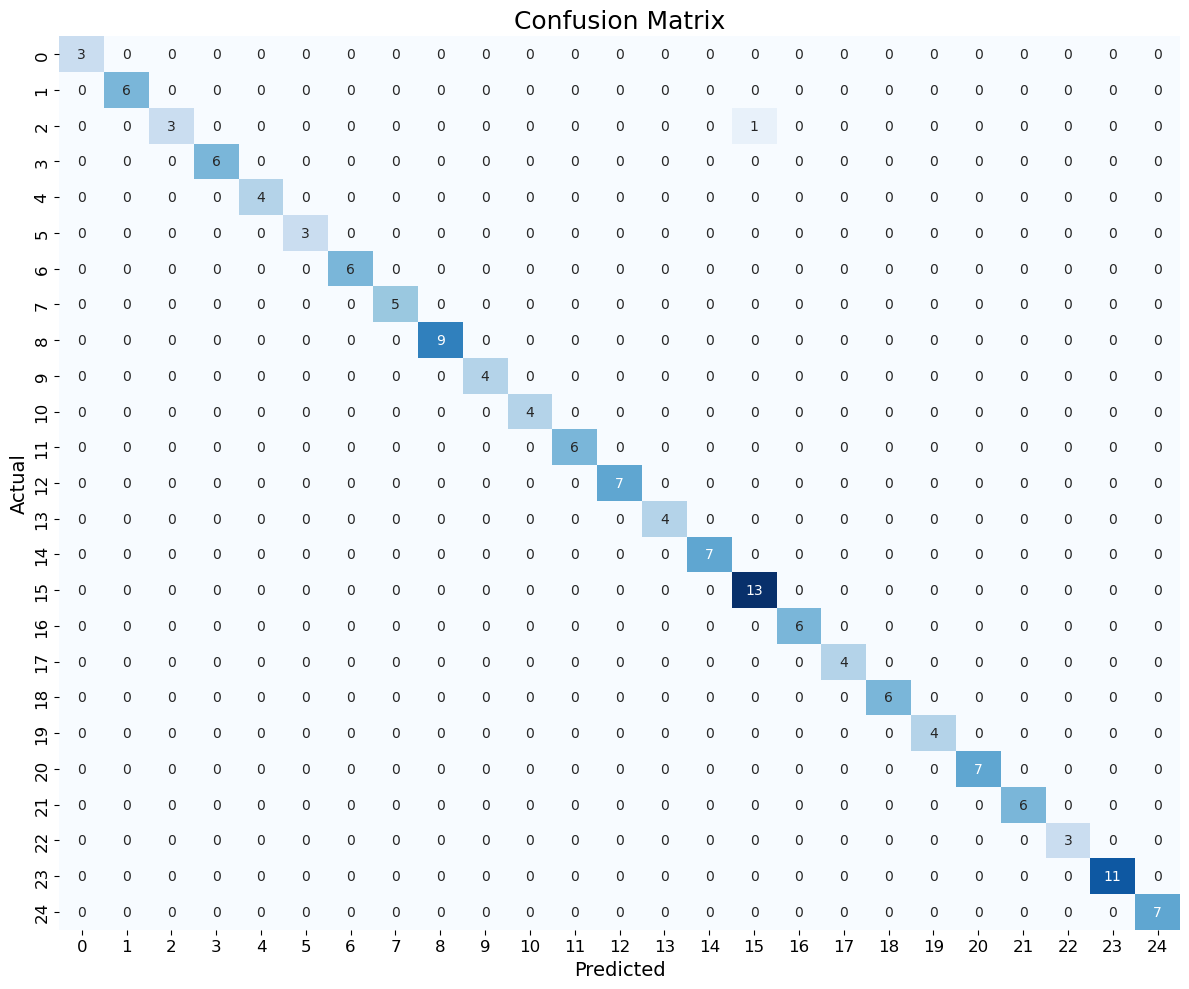

In [265]:
cm = confusion_matrix(y_valid, y_valid_pred_gridLG)

plt.figure(figsize=(12, 10))  
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.title("Confusion Matrix", fontsize=18)
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


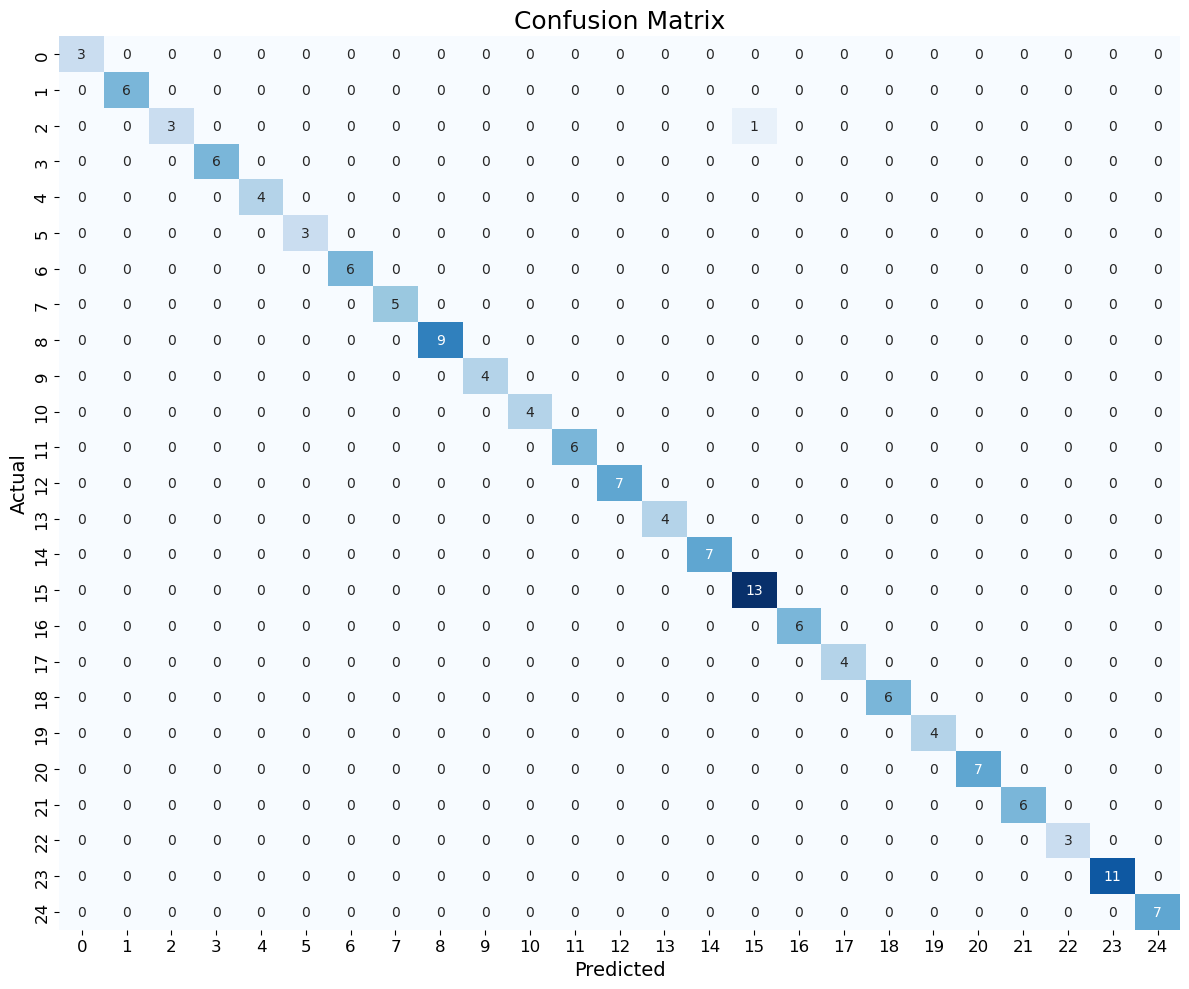

In [266]:
cm = confusion_matrix(y_valid, y_valid_pred_gridXGBC)

plt.figure(figsize=(12, 10))  
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.title("Confusion Matrix", fontsize=18)
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


# Accuracy score of both models

In [267]:
best_log_reg.score(X_test, y_test)

0.9930555555555556

In [268]:
best_xgbc.score(X_test, y_test)

0.9930555555555556

# saving models

In [269]:
joblib.dump(best_log_reg, "../models/logistic_reg.pkl")
joblib.dump(best_xgbc, "../models/xgboost_model.pkl")

['../models/xgboost_model.pkl']